# 1. Data Preparation

In [1]:
import pandas as pd
import json
with open('./tweets_DM.json') as data_file:
    papers = []
    for line in data_file:
        dic =json.loads(line)
        papers.append(dic)
    df_tweet = pd.json_normalize(papers)
df_tweet

,_score,_index,_crawldate,_type,_source.tweet.hashtags,_source.tweet.tweet_id,_source.tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,2015-05-12 12:51:52,tweets,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,2017-10-02 17:54:04,tweets,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,2016-10-10 11:04:32,tweets,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,2016-09-02 14:25:06,tweets,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [2]:
df_tweet = df_tweet.drop(['_score','_index','_type','_crawldate','_source.tweet.hashtags'],axis=1)
df_tweet = df_tweet.rename(columns={"_source.tweet.tweet_id":"id"})
df_tweet = df_tweet.rename(columns={"_source.tweet.text":"text"})
#df_tweet.to_csv('alltweets.csv',index=False)
df_tweet

,id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


Seperate Train & Test

In [3]:
df_tweets_new = []
df_tweet.shape

(1867535, 2)

In [4]:
df_ident = pd.read_csv('data_identification.csv')
df_ident = df_ident.rename(columns={"tweet_id":"id"})
df_ident

,id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [5]:
df_newtweet = df_tweet.merge(df_ident,left_on='id', right_on='id')
df_newtweet

,id,text,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,0x28b412,"Confident of your obedience, I write to you, k...",test
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",train


In [6]:
df_traintweet = df_newtweet.loc[df_newtweet['identification'] == 'train']
df_traintweet = df_traintweet.reset_index(drop=True)
df_traintweet

,id,text,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,train
...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train
1455559,0x38959e,In every circumtance I'd like to be thankful t...,train
1455560,0x2cbca6,there's currently two girls walking around the...,train
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",train


In [8]:
#df_trainlabel = pd.read_csv('emotion.csv')
#df_trainlabel = df_trainlabel.rename(columns={"tweet_id":"id"})
#df_newtraintweet = df_traintweet.merge(df_trainlabel,left_on='id', right_on='id')
#df_newtraintweet.drop('identification', inplace=True, axis=1)
df_newtraintweet = pd.read_csv('traintweets.csv')
df_newtraintweet

,id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,0x2cbca6,there's currently two girls walking around the...,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [9]:
#group to find distribution
df_newtraintweet.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

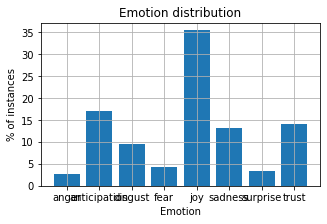

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = df_newtraintweet['emotion'].unique()
post_total = len(df_newtraintweet)
df1 = df_newtraintweet.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [11]:
df_testtweet = df_newtweet.loc[df_newtweet['identification'] == 'test']
df_testtweet = df_testtweet.reset_index(drop=True)
df_testtweet.drop('identification', inplace=True, axis=1)
df_testtweet.to_csv('testtweets.csv',index=False)
df_testtweet

,id,text
0,0x28b412,"Confident of your obedience, I write to you, k..."
1,0x2de201,"""Trust is not the same as faith. A friend is s..."
2,0x218443,When do you have enough ? When are you satisfi...
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
4,0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th..."
411968,0x2a980e,"""There is a lad here, which hath five barley l..."
411969,0x316b80,When you buy the last 2 tickets remaining for ...
411970,0x29d0cb,I swear all this hard work gone pay off one da...


In [2]:
import pandas as pd
import json
import numpy as np

In [157]:
df_traintweet = df_newtraintweet.sample(frac=0.01, replace=True ,random_state=1)
df_traintweet = df_traintweet.reset_index(drop=True)
df_traintweet

,id,text,emotion
0,0x354002,When your builder really lets you down and the...,joy
1,0x34eb73,@WildKingdumb Just got my @WildKingdumb sticke...,anticipation
2,0x287096,@wearefreeradio Got mine! Can't wait to hear t...,anticipation
3,0x3035d2,@FoxNews @FoxNewsOpinion @ericmetaxas What a <...,disgust
4,0x293a0d,@realDonaIdTrimp @CNN I hope google and outher...,disgust
...,...,...,...
14551,0x246b9f,Dro & Molly that was a passionate ass sex scen...,fear
14552,0x364b37,I get it that ppl don't like @realDonaldTrump ...,joy
14553,0x263a2b,Is Sikka the recent victim of Blue Whale chall...,anticipation
14554,0x335460,"@lexianne John 3:5-6 <LH> answered, “Most assu...",anticipation


In [5]:
df_newtraintweet = pd.read_pickle('df_traintweetsall.pkl')
df_traintweet = pd.read_pickle('df_traintweet.pkl')
df_testtweet = pd.read_pickle('df_testtweet.pkl')

# 2. Feature Engineering

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string

def has_numbers(inputString):
     return any(char.isdigit() for char in inputString)
    
partstop = ["''","'m","'re","'s","'ve",'..','...','....','.....',
            '``','’','“','”','lh']

stop = set(stopwords.words('english') + list(string.punctuation)+ list(partstop))

# build analyzers (bag-of-words)
# BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
TFIDF = TfidfVectorizer(max_features=1000, stop_words=stop, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
#BOW_500.fit(df_traintweet['text'])
TFIDF.fit(df_newtraintweet['text'])

#train_data_BOW_features_500 = BOW_500.transform(df_traintweet['text'])
train_data_tfidf_features_1000 = TFIDF.transform(df_newtraintweet['text'])

## check dimension
#train_data_BOW_features_500.shape
train_data_tfidf_features_1000.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yoyol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\yoyol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\yoyol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


(1455563, 1000)

In [9]:
#train_data_BOW_features_500.toarray()
train_data_tfidf_features_1000.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# observe some feature names
#feature_names_500 = BOW_500.get_feature_names()
feature_names_500 = TFIDF.get_feature_names()
feature_names_500[100:110]

['b',
 'baby',
 'back',
 'bad',
 'baffles',
 'bb19',
 'bc',
 'beat',
 'beautiful',
 'beauty']

In [12]:
feature_names_500

["'d",
 "'ll",
 '--',
 '......',
 '1',
 '1.0',
 '1.4',
 '1/2',
 '10',
 '100',
 '11',
 '12',
 '13',
 '13:13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '2',
 '2.3',
 '20',
 '2017',
 '2018',
 '21',
 '22',
 '23',
 '24',
 '25',
 '2nd',
 '3',
 '30',
 '31',
 '32',
 '37',
 '38',
 '4',
 '40',
 '41',
 '5',
 '6',
 '7',
 '70',
 '72',
 '75',
 '8',
 '9',
 'able',
 'absolutely',
 'accept',
 'account',
 'act',
 'action',
 'actually',
 'add',
 'af',
 'afraid',
 'afternoon',
 'ago',
 'agree',
 'ahead',
 'ai',
 'air',
 'album',
 'alive',
 'allah',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'amen',
 'america',
 'american',
 'americans',
 'another',
 'answer',
 'anxiety',
 'anymore',
 'anyone',
 'anything',
 'app',
 'apparently',
 'apple',
 'appreciate',
 'around',
 'ask',
 'asked',
 'asking',
 'ass',
 'attack',
 'attention',
 'august',
 'away',
 'awesome',
 'awkward',
 'b',
 'baby',
 'back',
 'bad',
 'baffles',
 'bb19',
 'bc',
 'beat',
 'beautiful',
 'beauty',
 '

In [13]:
"😂" in feature_names_500

True

# 3. Model

In [16]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
#X_train = BOW_500.transform(df_traintweet['text'])
#X_train = train_data_tfidf_features_1000#TFIDF.transform(df_newtraintweet['text'])
y_train = df_newtraintweet['emotion']

#X_test = BOW_500.transform(df_testtweet['text'])
#X_test = TFIDF.transform(df_testtweet['text'])
#y_test = df_testtweet['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
#print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 1000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 1000)


In [153]:
## build DecisionTree model
#DT_model = DecisionTreeClassifier(random_state=0)

## training!
#DT_model = DT_model.fit(X_train, y_train)
#print('finish training')

## predict!
#y_train_pred = DT_model.predict(X_train)
#print('finish training prediction')
#y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

finish training
finish training prediction


array(['joy', 'trust', 'sadness', 'trust', 'sadness', 'disgust',
       'disgust', 'joy', 'sadness', 'joy'], dtype=object)

In [ ]:
## build and train SVM model
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = X_train
y = y_train
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(with_mean=False), SVC(verbose=True,gamma='auto'))
clf.fit(X, y)
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svc', SVC(gamma='auto'))])

[LibSVM]

In [166]:
y_test_pred_svm = clf.predict(X_test)

In [167]:
y_test_pred_svm

array(['joy', 'anticipation', 'joy', ..., 'joy', 'joy', 'joy'],
      dtype=object)

In [160]:
#
X_train_whole = BOW_500.transform(df_newtraintweet['text'])
print('finish transform')
y_train_whole_pred = DT_model.predict(X_train_whole)
print('finish predict')
from sklearn.metrics import classification_report
print(classification_report(y_true=df_newtraintweet['emotion'], y_pred=y_train_whole_pred))

finish transform
finish predict
              precision    recall  f1-score   support

       anger       0.02      0.01      0.02     39867
anticipation       0.21      0.28      0.24    248935
     disgust       0.10      0.09      0.09    139101
        fear       0.06      0.32      0.10     63999
         joy       0.35      0.22      0.27    516017
     sadness       0.14      0.06      0.09    193437
    surprise       0.02      0.03      0.03     48729
       trust       0.11      0.07      0.09    205478

    accuracy                           0.17   1455563
   macro avg       0.13      0.14      0.12   1455563
weighted avg       0.21      0.17      0.18   1455563



In [154]:
y_test_pred

array(['joy', 'trust', 'sadness', ..., 'anticipation', 'surprise', 'joy'],
      dtype=object)

In [170]:
df_testtweet['emotion']=pd.Series(y_test_pred_svm)

after processing

In [140]:
for i in 

True


In [171]:
#df_testtweet = df_testtweet.rename(columns={"column_name":"emotion"})
#df_testtweet
df_result = df_testtweet.drop(['text'],axis=1)
df_result.to_csv('testingsubmission5svm.csv'c)
df_result

,id,emotion
0,0x28b412,joy
1,0x2de201,anticipation
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,joy
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,joy
411969,0x316b80,joy
411970,0x29d0cb,joy


# 4. Result Evaluation

In [172]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
#acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
#print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.86


In [173]:
feature_names_500

["'d",
 "'ll",
 '30',
 'able',
 'absolutely',
 'actually',
 'ago',
 'alive',
 'almost',
 'alone',
 'already',
 'also',
 'always',
 'amazing',
 'america',
 'another',
 'anyone',
 'anything',
 'around',
 'ask',
 'ass',
 'august',
 'away',
 'awesome',
 'b',
 'baby',
 'back',
 'bad',
 'beautiful',
 'become',
 'bed',
 'believe',
 'best',
 'better',
 'big',
 'birthday',
 'black',
 'bless',
 'blessed',
 'blessing',
 'blessings',
 'body',
 'book',
 'boy',
 'break',
 'bring',
 'business',
 'buy',
 'ca',
 'call',
 'called',
 'came',
 'car',
 'care',
 'cause',
 'change',
 'check',
 'children',
 'christ',
 'christmas',
 'class',
 'closed',
 'cnn',
 'coffee',
 'come',
 'comes',
 'coming',
 'content',
 'cool',
 'corinthians',
 'could',
 'country',
 'crazy',
 'dad',
 'damn',
 'day',
 'days',
 'dead',
 'dear',
 'death',
 'december',
 'different',
 'dinner',
 'dm',
 'dog',
 'done',
 'donniewahlberg',
 'dont',
 'dream',
 'dreams',
 'early',
 'earth',
 'eat',
 'else',
 'end',
 'enjoy',
 'enough',
 'episo

In [174]:
df_traintweet.groupby(['emotion']).count()['text']

emotion
anger            411
anticipation    2544
disgust         1424
fear             652
joy             5138
sadness         1897
surprise         467
trust           2023
Name: text, dtype: int64

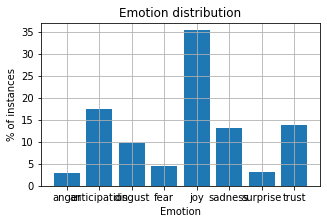

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = df_traintweet['emotion'].unique()
post_total = len(df_traintweet)
df1 = df_traintweet.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [175]:
df_testtweet.groupby(['emotion']).count()['text']

emotion
anger               20
anticipation     42057
disgust          10377
fear              3107
joy             320529
sadness          28799
surprise           417
trust             6666
Name: text, dtype: int64

In [177]:
df_traintweet.to_pickle("df_traintweet.pkl") 
df_testtweet.to_pickle("df_testtweet.pkl")

In [178]:
df_newtraintweet.to_pickle("df_traintweetsall.pkl") 